# Exploratory Data analysis

In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.metrics import accuracy_score
import math
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

#### Reading the data from CSV file

In [5]:
data = pd.read_csv("C:/Users/shash/Desktop/COursera/Dispatch.csv",header=0)

In [6]:
data.head()

,fttpproducttype,wbn_prod_type,ontrequiredind,wbn_ont_required,onttype,premisetype,stbcount,droptype,serviceordertype,classofservicename,...,ismigrate,isnt,isfitof,networkmigrationind,order_type,detailed_order_type,arrivalwindow,diff_cx_onprem,change_state,jobeffortcoeff
0,T,T,Y,Y,SFU,MDU,0,N,C,RES,...,Y,Y,N,N,NEW,MIGRATION,0900-1100,246,C,4.10
1,T,T,Y,Y,SFU,MDU,0,N,C,RES,...,Y,Y,N,N,NEW,MIGRATION,1000-1200,195,C,3.25
2,D,D,Y,Y,SFU,MDU,0,N,N,RES,...,N,N,N,N,NEW,NEW,1300-1500,232,X,3.87
3,D,D,N,Y,SFU,Unknown,0,B,N,RES,...,N,N,N,N,NEW,NEW,1400-1600,95,X,1.58
4,D,D,Y,N,SFU,SFU,0,B,N,RES,...,N,N,N,N,NEW,NEW,1500-1700,96,X,1.60


#### Lets check Number of rows and columns in the dataset

In [7]:
data.shape

(180647, 37)

In [8]:
data.columns

Index(['fttpproducttype', 'wbn_prod_type', 'ontrequiredind',
       'wbn_ont_required', 'onttype', 'premisetype', 'stbcount', 'droptype',
       'serviceordertype', 'classofservicename', 'dataordertype',
       'videoordertype', 'wirecentergroupid', 'gponind', 'adlflag',
       'hfwsindicator', 'dispatchreason', 'winbackind', 'winbackocn', 'bdvind',
       'bdvnooflines', 'traveltime', 'rewiringrequired', 'swapontind',
       'drcregion', 'ont_status', 'migrateorderind', 'ismigrate', 'isnt',
       'isfitof', 'networkmigrationind', 'order_type', 'detailed_order_type',
       'arrivalwindow', 'diff_cx_onprem', 'change_state', 'jobeffortcoeff'],
      dtype='object')

#### Replacing null values with mode

In [9]:
data.premisetype = data.premisetype.replace('Unknown',np.NaN)
data.wbn_prod_type = data.wbn_prod_type.replace('NONE',np.NaN)
data.stbcount = data.stbcount.replace('X',np.NaN)
data.dispatchreason = data.dispatchreason.replace('None',np.NaN)
data.winbackocn = data.winbackocn.replace('None',np.NaN)

In [10]:
data['premisetype'] = data['premisetype'].fillna(data['premisetype'].mode()[0])
data['wbn_prod_type'] = data['wbn_prod_type'].fillna(data['wbn_prod_type'].mode()[0])
data['stbcount'] = data['stbcount'].fillna(data['stbcount'].mode()[0])
data['dispatchreason'] = data['dispatchreason'].fillna(data['dispatchreason'].mode()[0])
data['winbackocn'] = data['winbackocn'].fillna(data['winbackocn'].mode()[0])

In [11]:
data.shape

(180647, 37)

In [12]:
# converting stbcount to numeric
data["stbcount"] = pd.to_numeric(data["stbcount"])
# converting wirecentergroupid to categorical
data.wirecentergroupid = data.wirecentergroupid.astype(str)

#### Continious Variable data analysis

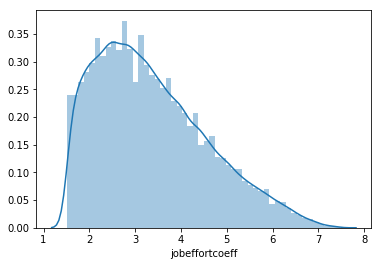

In [13]:
sns.distplot(data.jobeffortcoeff);

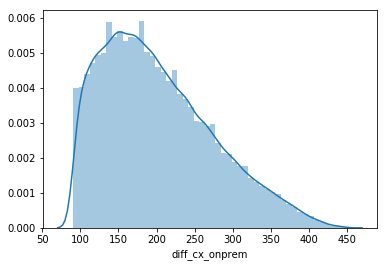

In [14]:
sns.distplot(data.diff_cx_onprem);

#### observation : distribution of jobeffortcoeff and diff_cx_onprem are strongly similar

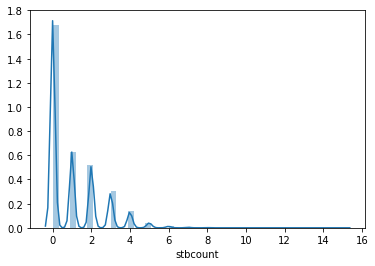

In [15]:
col = "stbcount"
sns.distplot(data.stbcount)

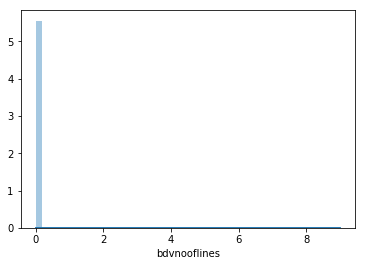

In [16]:
sns.distplot(data.bdvnooflines);

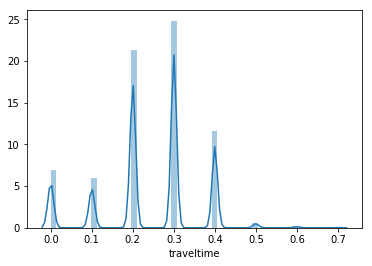

In [17]:
sns.distplot(data.traveltime);

In [18]:
# Summary statistics of the data
data.describe()

,stbcount,bdvnooflines,traveltime,diff_cx_onprem,jobeffortcoeff
count,180647.000000,180647.000000,180647.000000,180647.000000,180647.000000
mean,1.045708,0.000360,0.243514,201.729926,3.362163
std,1.338863,0.042545,0.118642,72.823714,1.213728
min,0.000000,0.000000,0.000000,91.000000,1.520000
25%,0.000000,0.000000,0.200000,144.000000,2.400000
50%,0.000000,0.000000,0.300000,190.000000,3.170000
75%,2.000000,0.000000,0.300000,249.000000,4.150000
max,15.000000,9.000000,0.700000,449.000000,7.480000


In [19]:
data.stbcount.median(), data.traveltime.median(), data.bdvnooflines.median()

(0.0, 0.3, 0.0)

#### Observation : stbcount, traveltime, bdvnooflines have discrete values

In [20]:
# Correlation between the numerical variables
data.corr()

,stbcount,bdvnooflines,traveltime,diff_cx_onprem,jobeffortcoeff
stbcount,1.000000,-0.001358,0.029636,0.308754,0.308758
bdvnooflines,-0.001358,1.000000,-0.001347,0.001738,0.001733
traveltime,0.029636,-0.001347,1.000000,-0.021181,-0.021175
diff_cx_onprem,0.308754,0.001738,-0.021181,1.000000,0.999997
jobeffortcoeff,0.308758,0.001733,-0.021175,0.999997,1.000000


#### observation : 
#### stbcount positively correlates with target
#### diff_cx_onprem is highly positively correlated to target variable(just a matter of unit conversion minutes to hours)

#### joint distributions for continious variables and taget variable

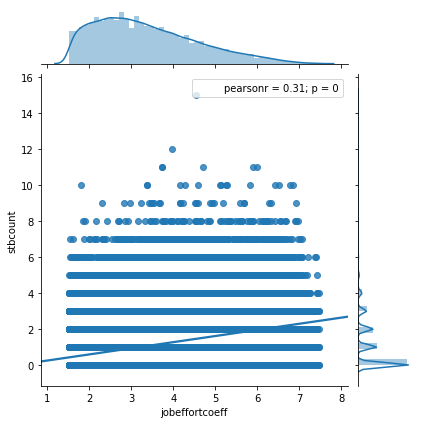

In [21]:
sns.jointplot(x="jobeffortcoeff", y="stbcount", data=data, kind="reg")

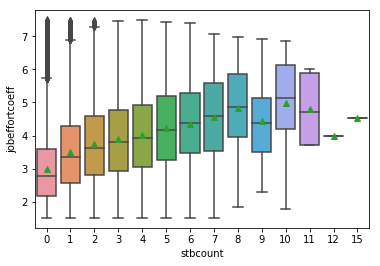

In [22]:
sns.boxplot(x="stbcount", y="jobeffortcoeff", data=data, showmeans=True);

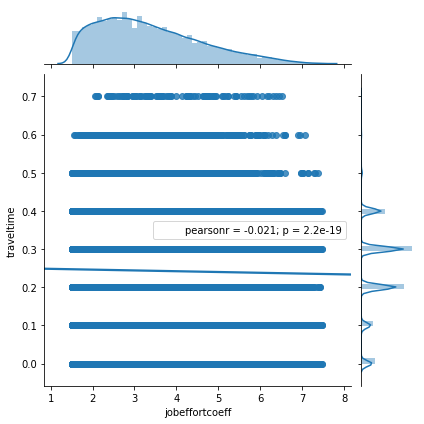

In [23]:
sns.jointplot(x="jobeffortcoeff", y="traveltime", data=data, kind="reg")

#### Observation : More effort is seemed to be taken if travel time is 0.3, Need more business knowledge on the travel time

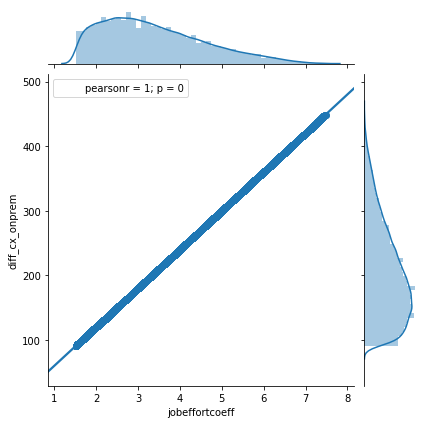

In [24]:
sns.jointplot(x="jobeffortcoeff", y="diff_cx_onprem", data=data, kind="reg")

### Categorical data analysis

converting continious target into buckets/classes

In [25]:
data["new_label"] = data.jobeffortcoeff.apply(lambda x : math.ceil(x))

##### label counts in each fttpproducttype

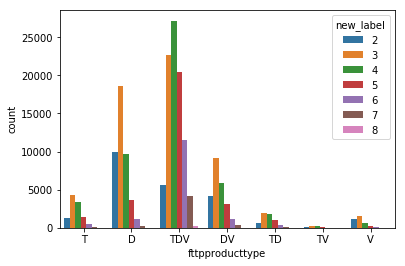

In [26]:
col = 'fttpproducttype'
sns.countplot(data=data,hue="new_label",x=col)

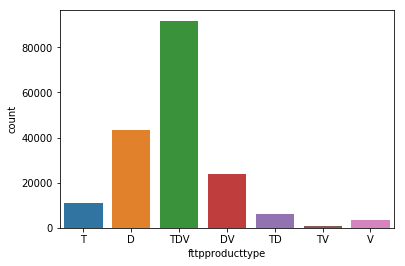

In [27]:
col = 'fttpproducttype'
sns.countplot(data=data,x=col)

##### box plots for categorical variables with target variable

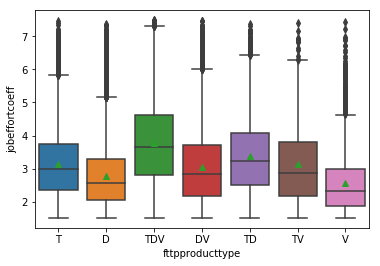

In [28]:
sns.boxplot(x="fttpproducttype", y="jobeffortcoeff", data=data, showmeans=True);
# sns.lmplot(x="fttpproducttype", y="jobeffortcoeff", data=data, x_estimator=np.mean, fit_reg = False);

#### Observation : Meadin value of jobeffortcoeff for TDV category is highest followed by TD, TV, T 

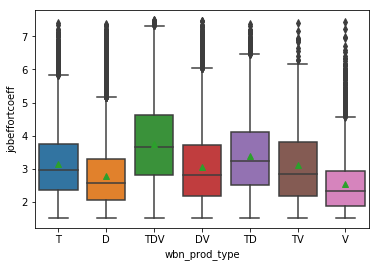

In [29]:
sns.boxplot(x="wbn_prod_type", y="jobeffortcoeff", data=data, showmeans=True);

#### Observation : distribution of target variable over wbn_prod_type is very similar to fttpproducttype

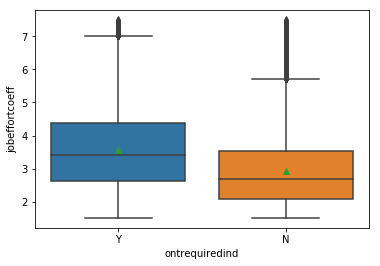

In [30]:
sns.boxplot(x="ontrequiredind", y="jobeffortcoeff", data=data, showmeans=True);

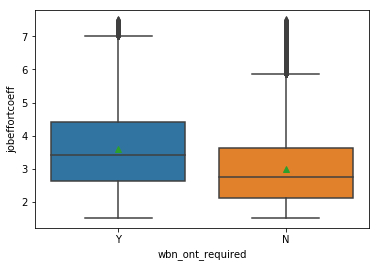

In [31]:
sns.boxplot(x="wbn_ont_required", y="jobeffortcoeff", data=data, showmeans=True);

#### Observation : distribution of target variable over wbn_ont_required is very similar to ontrequiredind

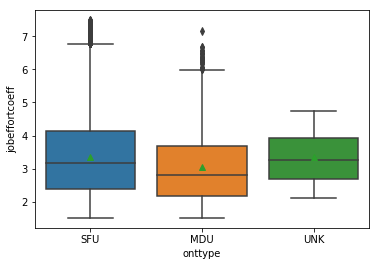

In [32]:
sns.boxplot(x="onttype", y="jobeffortcoeff", data=data, showmeans=True);

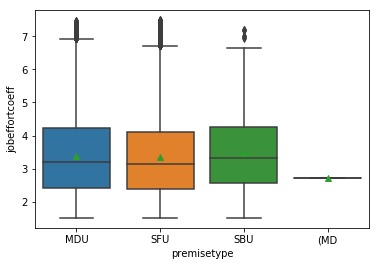

In [33]:
sns.boxplot(x="premisetype", y="jobeffortcoeff", data=data, showmeans=True);

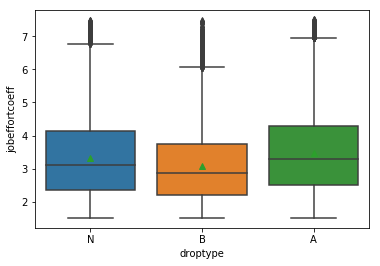

In [34]:
sns.boxplot(x="droptype", y="jobeffortcoeff", data=data, showmeans=True);

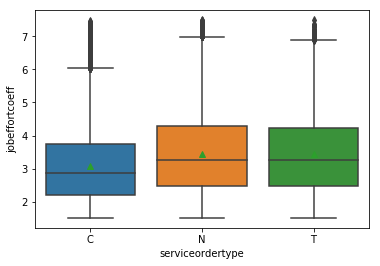

In [35]:
sns.boxplot(x="serviceordertype", y="jobeffortcoeff", data=data, showmeans=True);

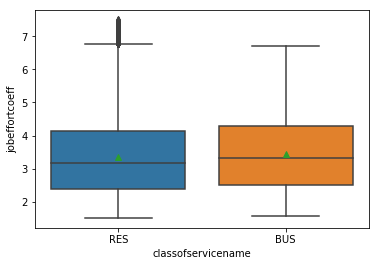

In [36]:
sns.boxplot(x="classofservicename", y="jobeffortcoeff", data=data, showmeans=True);

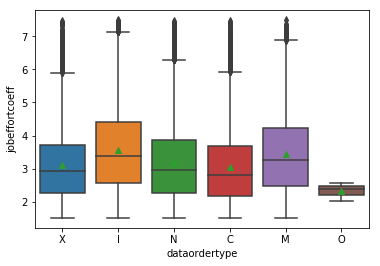

In [37]:
sns.boxplot(x="dataordertype", y="jobeffortcoeff", data=data, showmeans=True);

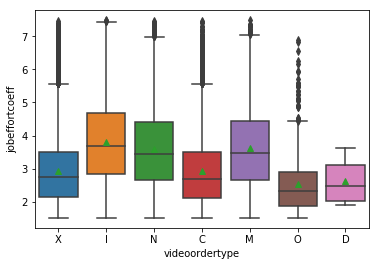

In [38]:
sns.boxplot(x="videoordertype", y="jobeffortcoeff", data=data, showmeans=True);

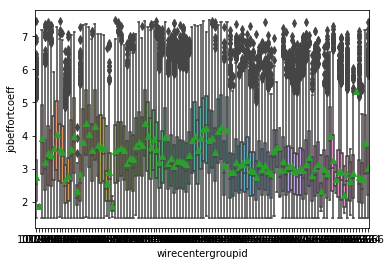

In [39]:
sns.boxplot(x="wirecentergroupid", y="jobeffortcoeff", data=data, showmeans=True);

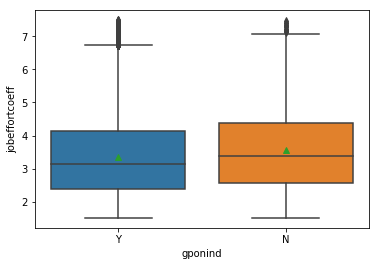

In [40]:
sns.boxplot(x="gponind", y="jobeffortcoeff", data=data, showmeans=True);

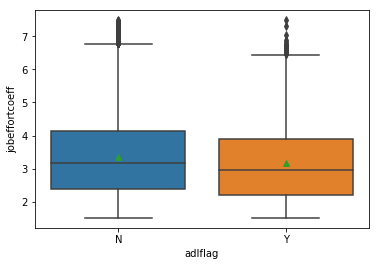

In [41]:
sns.boxplot(x="adlflag", y="jobeffortcoeff", data=data, showmeans=True);

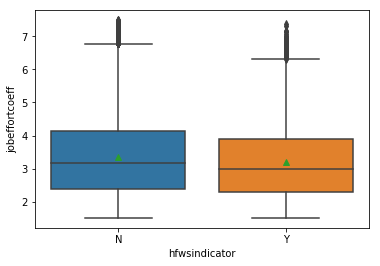

In [42]:
sns.boxplot(x="hfwsindicator", y="jobeffortcoeff", data=data, showmeans=True);

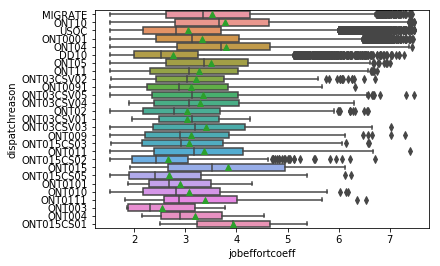

In [43]:
sns.boxplot(y="dispatchreason", x="jobeffortcoeff", data=data, showmeans=True);

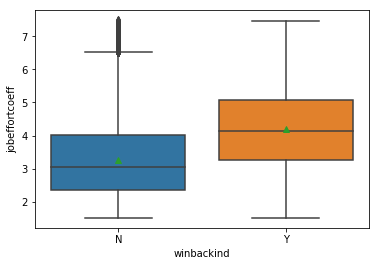

In [44]:
sns.boxplot(x="winbackind", y="jobeffortcoeff", data=data, showmeans=True);

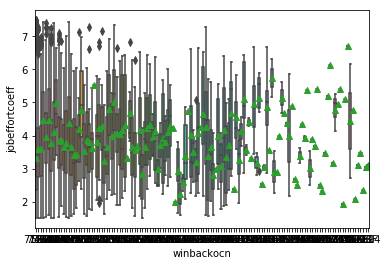

In [45]:
sns.boxplot(x="winbackocn", y="jobeffortcoeff", data=data, showmeans=True);

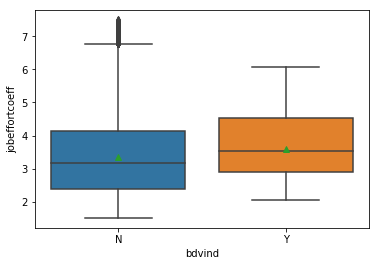

In [46]:
sns.boxplot(x="bdvind", y="jobeffortcoeff", data=data, showmeans=True);

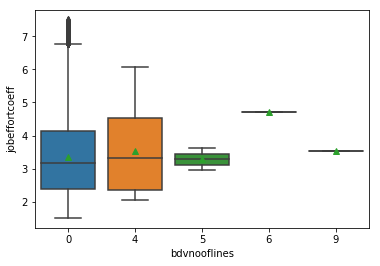

In [47]:
sns.boxplot(x="bdvnooflines", y="jobeffortcoeff", data=data, showmeans=True);

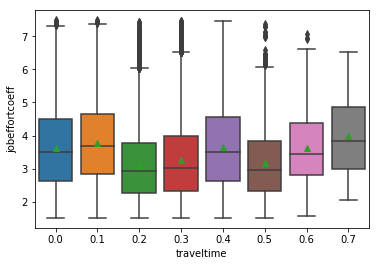

In [48]:
sns.boxplot(x="traveltime", y="jobeffortcoeff", data=data, showmeans=True);

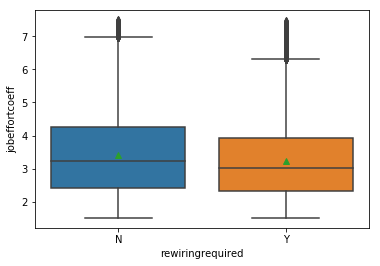

In [49]:
sns.boxplot(x="rewiringrequired", y="jobeffortcoeff", data=data, showmeans=True);

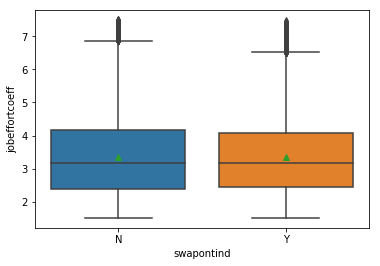

In [50]:
sns.boxplot(x="swapontind", y="jobeffortcoeff", data=data, showmeans=True);

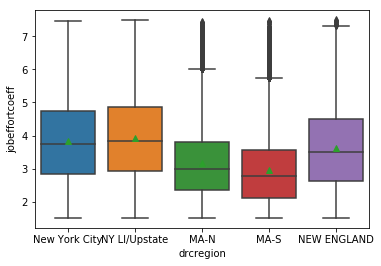

In [51]:
sns.boxplot(x="drcregion", y="jobeffortcoeff", data=data, showmeans=True);

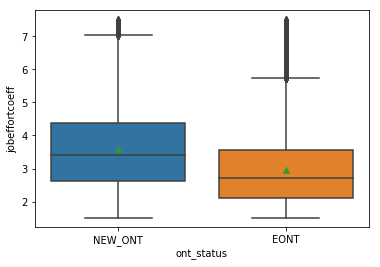

In [52]:
sns.boxplot(x="ont_status", y="jobeffortcoeff", data=data, showmeans=True);

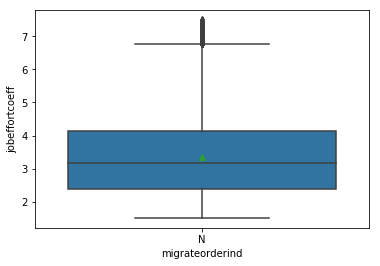

In [53]:
sns.boxplot(x="migrateorderind", y="jobeffortcoeff", data=data, showmeans=True);

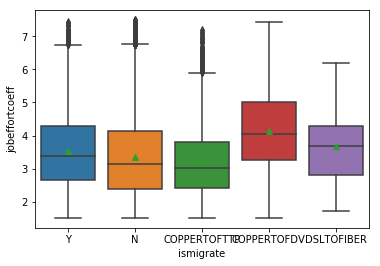

In [54]:
sns.boxplot(x="ismigrate", y="jobeffortcoeff", data=data, showmeans=True);

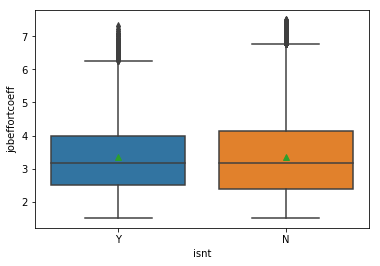

In [55]:
sns.boxplot(x="isnt", y="jobeffortcoeff", data=data, showmeans=True);

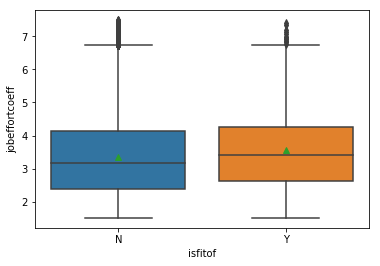

In [56]:
sns.boxplot(x="isfitof", y="jobeffortcoeff", data=data, showmeans=True);

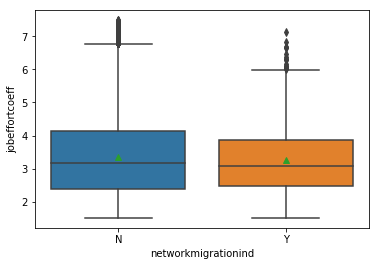

In [57]:
sns.boxplot(x="networkmigrationind", y="jobeffortcoeff", data=data, showmeans=True);

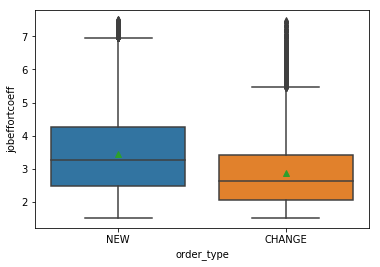

In [58]:
sns.boxplot(x="order_type", y="jobeffortcoeff", data=data, showmeans=True);

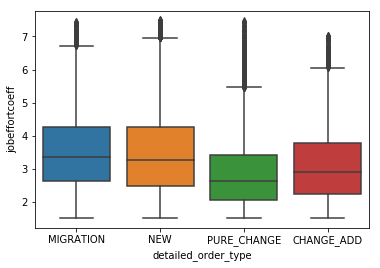

In [59]:
sns.boxplot(x="detailed_order_type", y="jobeffortcoeff", data=data);

In [60]:
# sorting data by arrival window
data['sorted'] = data['arrivalwindow'].apply(lambda x: int(x.split("-")[0]))
data = data.sort_values(by=['sorted'])

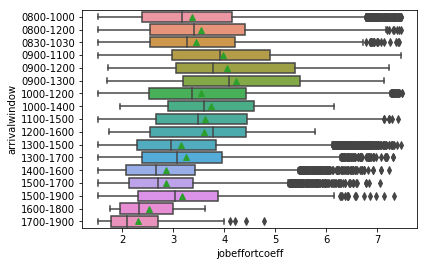

In [61]:
sns.boxplot(y="arrivalwindow", x="jobeffortcoeff", data=data, showmeans=True);

#### Observation : seems like Delay is at peak during office hours that is at 9 am in the morning. slowly delay decreases.

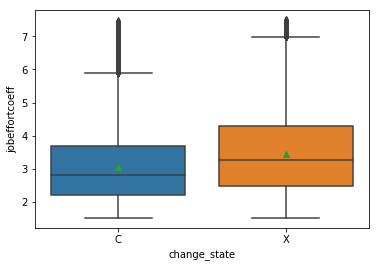

In [62]:
sns.boxplot(x="change_state", y="jobeffortcoeff", data=data, showmeans=True);

# Anova test - Relation ship between categorical and Continuous variable

#### Null Hypothesis: There is nothing going on between the variables, there is no relationship between the two variables X(Categorical) and Job effort Coef(Target - Continuous)
#### Alternate Hypothesis: There is something going on between the predictor and target variable, or there is a relationship between the two.

In [63]:
# Statistically significant - High F score, we can reject Null hypothesis
model = smf.ols(formula='jobeffortcoeff ~ fttpproducttype', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     4390.
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:27:43   Log-Likelihood:            -2.7902e+05
No. Observations:              180647   AIC:                         5.581e+05
Df Residuals:                  180640   BIC:                         5.581e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

In [64]:
model = smf.ols(formula='jobeffortcoeff ~ ontrequiredind', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                 1.150e+04
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:28:09   Log-Likelihood:            -2.8574e+05
No. Observations:              180647   AIC:                         5.715e+05
Df Residuals:                  180645   BIC:                         5.715e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.9480    

In [65]:
# Low F score, Doesent add value to the model
model = smf.ols(formula='jobeffortcoeff ~ hfwsindicator', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     105.7
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           8.87e-25
Time:                        16:28:44   Log-Likelihood:            -2.9126e+05
No. Observations:              180647   AIC:                         5.825e+05
Df Residuals:                  180645   BIC:                         5.826e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.3674      0

In [66]:
# Modereate F score, Better to keep
model = smf.ols(formula='jobeffortcoeff ~ dispatchreason', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     562.2
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:29:09   Log-Likelihood:            -2.8429e+05
No. Observations:              180647   AIC:                         5.686e+05
Df Residuals:                  180620   BIC:                         5.689e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [67]:
model = smf.ols(formula='jobeffortcoeff ~ winbackind', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     9536.
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:29:19   Log-Likelihood:            -2.8667e+05
No. Observations:              180647   AIC:                         5.733e+05
Df Residuals:                  180645   BIC:                         5.734e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.2740      0.003   11

In [68]:
model = smf.ols(formula='jobeffortcoeff ~ rewiringrequired', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1108.
Date:                Mon, 04 Mar 2019   Prob (F-statistic):          2.63e-242
Time:                        16:29:30   Log-Likelihood:            -2.9076e+05
No. Observations:              180647   AIC:                         5.815e+05
Df Residuals:                  180645   BIC:                         5.816e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.42

In [69]:
# Low F Score - Not required in the model
model = smf.ols(formula='jobeffortcoeff ~ bdvind', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4934
Date:                Mon, 04 Mar 2019   Prob (F-statistic):              0.482
Time:                        16:29:46   Log-Likelihood:            -2.9132e+05
No. Observations:              180647   AIC:                         5.826e+05
Df Residuals:                  180645   BIC:                         5.827e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.3621      0.003   1177.316      

In [70]:
# Low F score, not required in the model
model = smf.ols(formula='jobeffortcoeff ~ swapontind', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.396
Date:                Mon, 04 Mar 2019   Prob (F-statistic):             0.0360
Time:                        16:30:07   Log-Likelihood:            -2.9132e+05
No. Observations:              180647   AIC:                         5.826e+05
Df Residuals:                  180645   BIC:                         5.827e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3653      0.003   10

In [71]:
model = smf.ols(formula='jobeffortcoeff ~ wbn_ont_required', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                 1.129e+04
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:30:21   Log-Likelihood:            -2.8584e+05
No. Observations:              180647   AIC:                         5.717e+05
Df Residuals:                  180645   BIC:                         5.717e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.98

In [72]:
model = smf.ols(formula='jobeffortcoeff ~ onttype', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     60.57
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           5.08e-27
Time:                        16:30:37   Log-Likelihood:            -2.9126e+05
No. Observations:              180647   AIC:                         5.825e+05
Df Residuals:                  180644   BIC:                         5.825e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0443      0.029    104.

In [73]:
# Low F Score

model = smf.ols(formula='jobeffortcoeff ~ premisetype', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     21.54
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           6.08e-14
Time:                        16:30:57   Log-Likelihood:            -2.9128e+05
No. Observations:              180647   AIC:                         5.826e+05
Df Residuals:                  180643   BIC:                         5.826e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.7200      1

In [74]:

model = smf.ols(formula='jobeffortcoeff ~ stbcount', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                 1.904e+04
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:31:07   Log-Likelihood:            -2.8227e+05
No. Observations:              180647   AIC:                         5.645e+05
Df Residuals:                  180645   BIC:                         5.646e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0695      0.003    890.624      0.0

In [75]:
model = smf.ols(formula='jobeffortcoeff ~ droptype', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1421.
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:31:25   Log-Likelihood:            -2.8991e+05
No. Observations:              180647   AIC:                         5.798e+05
Df Residuals:                  180644   BIC:                         5.799e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.4773      0.004    898.653

In [76]:
model = smf.ols(formula='jobeffortcoeff ~ serviceordertype', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1574.
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:31:40   Log-Likelihood:            -2.8976e+05
No. Observations:              180647   AIC:                         5.795e+05
Df Residuals:                  180644   BIC:                         5.796e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.09

In [77]:
model = smf.ols(formula='jobeffortcoeff ~ drcregion', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     4873.
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:31:52   Log-Likelihood:            -2.8206e+05
No. Observations:              180647   AIC:                         5.641e+05
Df Residuals:                  180642   BIC:                         5.642e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [78]:

model = smf.ols(formula='jobeffortcoeff ~ ont_status', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                 1.150e+04
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:32:01   Log-Likelihood:            -2.8574e+05
No. Observations:              180647   AIC:                         5.715e+05
Df Residuals:                  180645   BIC:                         5.715e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.94

In [79]:
model = smf.ols(formula='jobeffortcoeff ~ migrateorderind', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Mon, 04 Mar 2019   Prob (F-statistic):                nan
Time:                        16:32:13   Log-Likelihood:            -2.9132e+05
No. Observations:              180647   AIC:                         5.826e+05
Df Residuals:                  180646   BIC:                         5.826e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3622      0.003   1177.369      0.0

C:\Users\shash\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In [80]:
model = smf.ols(formula='jobeffortcoeff ~ bdvnooflines', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         jobeffortcoeff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5428
Date:                Mon, 04 Mar 2019   Prob (F-statistic):              0.461
Time:                        16:33:47   Log-Likelihood:            -2.9132e+05
No. Observations:              180647   AIC:                         5.826e+05
Df Residuals:                  180645   BIC:                         5.827e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.3621      0.003   1177.319   

## Observation: Below listed variables doesnt add any value in predicting the target according to the Anova test
1. hfwsindicator
2. bdvind
3. swapontind
4. onttype
5. premisetype
6. migrateorderind
7. ismigrate
8. isnt
9. bdvnooflines